In [ ]:
import PyPDF2

# Abre el archivo PDF en modo de lectura binaria
with open('/content/12_compressed_compressed.pdf', 'rb') as pdf_file:
    pdf_reader = PyPDF2.PdfFileReader(pdf_file)

    # Inicializa una cadena para almacenar el texto extraído
    text = ''

    # Itera a través de cada página del PDF y extrae el texto
    for page_number in range(pdf_reader.numPages):
        page = pdf_reader.getPage(page_number)
        text += page.extractText()

# Guarda el texto extraído en un archivo de texto
with open('texto_extraido.txt', 'w', encoding='utf-8') as text_file:
    text_file.write(text)


ModuleNotFoundError: ignored

In [ ]:
import pandas as pd
import gdown
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
from sklearn.metrics import silhouette_score

from sklearn.cluster import KMeans

warnings.filterwarnings('ignore')

gdown.download('https://datosabiertos.mineduc.cl/wp-content/uploads/2023/02/Rendimiento-2022.rar',quiet=True)
gdown.download('https://datosabiertos.mineduc.cl/wp-content/uploads/2021/12/Rendimiento-2020.rar',quiet=True)
gdown.download('https://datosabiertos.mineduc.cl/wp-content/uploads/2021/12/Rendimiento-2018.rar',quiet=True)

!unrar x '/content/Rendimiento-2022.rar'  "/content/rendimiento/" -o+ -idq
!unrar x '/content/Rendimiento-2020.rar'  "/content/rendimiento/" -o+ -idq
!unrar x '/content/Rendimiento-2018.rar'  "/content/rendimiento/" -o+ -idq


!rm '/content/rendimiento/Frecuencia_Rendimiento_2022_web.xlsx'
!rm '/content/rendimiento/Frecuencia_Rendimiento_2018_WEB.xlsx'
!rm '/content/rendimiento/ER Rendimiento por alumno, bases Web.pdf'
!rm '/content/rendimiento/Frecuencia_Rendimiento_2020_WEB.xlsx'
!rm '/content/rendimiento/Recomendaciones_uso_BBDD.pdf'

r_2022=pd.read_csv('/content/rendimiento/20230209_Rendimiento_2022_20230131_WEB.csv',sep=';')
r_2020=pd.read_csv('/content/rendimiento/20210223_Rendimiento_2020_20210131_WEB.csv',sep=';')
r_2018=pd.read_csv('/content/rendimiento/20190220_Rendimiento_2018_20190131_PUBL.csv',sep=';')

r_2022=r_2022[['RBD','COD_ENSE2','COD_REG_RBD','COD_COM_ALU','GEN_ALU','PROM_GRAL','ASISTENCIA','RURAL_RBD','EDAD_ALU','COD_JOR','COD_DEPE2','SIT_FIN_R']]
r_2020=r_2020[['RBD','COD_ENSE2','COD_REG_RBD','COD_COM_ALU','GEN_ALU','PROM_GRAL','ASISTENCIA','RURAL_RBD','EDAD_ALU','COD_JOR','COD_DEPE2','SIT_FIN_R']]
r_2018=r_2018[['RBD','COD_ENSE2','COD_REG_RBD','COD_COM_ALU','GEN_ALU','PROM_GRAL','ASISTENCIA','RURAL_RBD','EDAD_ALU','COD_JOR','COD_DEPE2','SIT_FIN_R']]


r_2022=r_2022.replace(r'^\s*$', np.nan, regex=True)
r_2022["EDAD_ALU"] = pd.to_numeric(r_2022["EDAD_ALU"], errors='coerce')
r_2022["PROM_GRAL"]=r_2022["PROM_GRAL"].replace(',', '.', regex=True).astype(float)

r_2022 = r_2022.dropna()

cantidad_ceros = r_2022["GEN_ALU"].value_counts().get(0, 0)
r_2022.drop(r_2022[r_2022["GEN_ALU"]==0].index,axis=0,inplace=True)

cantidad_ceros = r_2022["ASISTENCIA"].value_counts().get(0, 0)
r_2022.drop(r_2022[r_2022["ASISTENCIA"]==0].index,axis=0,inplace=True)

cantidad_ceros = r_2022["PROM_GRAL"].value_counts().get(0, 0)
r_2022.drop(r_2022[r_2022["PROM_GRAL"]==0].index,axis=0,inplace=True)

r_2022.reset_index(inplace=True,drop=True)


r_2020=r_2020.replace(r'^\s*$', np.nan, regex=True)
r_2020["EDAD_ALU"] = pd.to_numeric(r_2020["EDAD_ALU"], errors='coerce')
r_2020["PROM_GRAL"]=r_2020["PROM_GRAL"].replace(',', '.', regex=True).astype(float)

r_2020 = r_2020.dropna()

cantidad_ceros = r_2020["GEN_ALU"].value_counts().get(0, 0)
r_2020.drop(r_2020[r_2020["GEN_ALU"]==0].index,axis=0,inplace=True)

cantidad_ceros = r_2020["ASISTENCIA"].value_counts().get(0, 0)
r_2020.drop(r_2020[r_2020["ASISTENCIA"]==0].index,axis=0,inplace=True)

cantidad_ceros = r_2020["PROM_GRAL"].value_counts().get(0, 0)
r_2020.drop(r_2020[r_2020["PROM_GRAL"]==0].index,axis=0,inplace=True)

r_2020.reset_index(inplace=True,drop=True)


r_2018=r_2018.replace(r'^\s*$', np.nan, regex=True)
r_2018["EDAD_ALU"] = pd.to_numeric(r_2018["EDAD_ALU"], errors='coerce')
r_2018["PROM_GRAL"]=r_2018["PROM_GRAL"].replace(',', '.', regex=True).astype(float)

r_2018 = r_2018.dropna()

cantidad_ceros = r_2018["GEN_ALU"].value_counts().get(0, 0)
r_2018.drop(r_2018[r_2018["GEN_ALU"]==0].index,axis=0,inplace=True)

cantidad_ceros = r_2018["ASISTENCIA"].value_counts().get(0, 0)
r_2018.drop(r_2018[r_2018["ASISTENCIA"]==0].index,axis=0,inplace=True)

cantidad_ceros = r_2018["PROM_GRAL"].value_counts().get(0, 0)
r_2018.drop(r_2018[r_2018["PROM_GRAL"]==0].index,axis=0,inplace=True)

r_2018.reset_index(inplace=True,drop=True)

# **Hito 3: Análisis de data de desempeño académico estudiantil Grupo 3**

**Integrantes :** Allen Arroyo Garrido, José Badilla, Benjamín Angulo, Benjamín Llancao, Bárbara Aguayo





# **Hito 1 y 2**




## **1. Motivación**

El sistema educacional chileno ha enfrentado dificultades para mejorar la calidad de la enseñanza, especialmente debido a la pandemia de COVID-19. Entre los problemas se encuentran la falta de profesionales en la educación, deserción escolar y disparidad significativa en el rendimiento estudiantil. Es necesario determinar los factores más significativos y abordables a corto-mediano plazo para garantizar la calidad de la formación de las próximas generaciones. El enfoque del proyecto es el estudio del rendimiento académico y las variables que lo afectan.

### **2. Base de datos**

Se analiza el dataset utilizando gráficos que relacionan asistencia, género, ruralidad, nota promedio anual y otra información relevante.

La base de datos utilizada es proporcionada por el [MINEDUC](https://datosabiertos.mineduc.cl/rendimiento-por-estudiante-2/). Contiene información sobre el rendimiento escolar de estudiantes de educación básica y media en los últimos 20 años. Las columnas incluyen:
1. AGNO (Numérico): Año escolar
2. RBD (Numérico): Rol base de datos del establecimiento
3. DGV_RBD (Numérico): Dígito Verificador del RBD
4. ... (...)
5. SIT_FIN (Cadena): Situación de promoción al cierre del año escolar
6. SIT_FIN_R (Cadena): Situación de promoción al cierre del año escolar, con indicador de traslado
7. COD_MEN (Cadena): Mención (Ver anexo X)


Se seleccionarán los datos de los años: 2022, 2020 y 2018, para obtener información previa, durante y posterior a la pandemia.

Dimensiones del dataset de 2022: (3405130, 37)


## **2.2 Exploración de Datos**

Realizaremos la exploración del dataset utilizando los datos de los años mencionados.

### 2.2.1 Pre-procesamiento

El primer paso consiste en eliminar las columnas innecesarias para los objetivos actuales del Hito 1. Estas columnas contienen información irrelevante o duplicada para el análisis del rendimiento escolar en esta etapa del proyecto.

Se realiza el pre-procesamiento utilizando el documento "ER Rendimiento por alumno, bases Web.pdf" proporcionado por MINEDUC. Este documento es el esquema de registro que se utiliza al descargar el archivo de rendimiento por año desde el enlace: [https://datosabiertos.mineduc.cl/rendimiento-por-estudiante-2/](https://datosabiertos.mineduc.cl/rendimiento-por-estudiante-2/).

Las columnas seleccionadas son:

|          |                                                            |
|----------|------------------------------------------------------------|
| 1. COD_ENSE2 - Niveles de enseñanza agrupados                   | 2. COD_REG_RBD - Código de región del establecimiento escolar|
| 3. COD_COM_ALU - Código de la región de residencia del estudiante| 4. GEN_ALU - Género del alumno                                |
| 5. PROM_GRAL - Promedio general anual                           | 6. ASISTENCIA - Porcentaje anual de asistencia                |
| 7. RURAL_RBD - Índice de ruralidad del establecimiento          | 8. EDAD_ALU - Edad al 30 de junio del año escolar correspondiente|
| 9. COD_JOR - Jornada en la que asiste a clases                  | 10. COD_DEPE2 - Código de Dependencia del Establecimiento (agrupado)|
| 11. SIT_FIN_R - Situación de promoción al cierre del año escolar, con indicador de traslado | |



Se eliminaron columnas redundantes, como "NOM_REG_RBD_A" que proporciona la misma información que "COD_REG_RBD", y columnas innecesarias como "LET_RBD", "NOM_RBD" y "FEC_NAC_ALU".

El resultado es un conjunto de datos con 11 columnas en lugar de las 37 originales.

Nota: Atributos relevantes como GD_ALU(que indica si el estudiante es de un grupo diferencial) en los 3 años estudiados no existen registros y FEC_ING_ALU atributo de fecha de ingreso del alumno al establecimiento tampoco.

También se eliminaron las filas con valores NaN y sin información en asistencia, promedio y género para los 3 años. A continuación se muestra el porcentaje de datos eliminados por cada motivo:

<style>
table {
  width: 60%;
  margin-bottom: 0;
}

th, td {
  padding: 5px;
}

table, th, td {
  border: none;
}
</style>

| Año |       | COD_ENSE2 | COD_REG_RBD | COD_COM_ALU | GEN_ALU | PROM_GRAL | ASISTENCIA | RURAL_RBD | EDAD_ALU | COD_JOR | COD_DEPE2 | SIT_FIN_R |
|-----|-------|-----------|-------------|-------------|---------|-----------|------------|-----------|----------|---------|-----------|-----------|
| 2022| NaN's | 0.000000  | 0.000000    | 0.000000    | 0.000000| 0.000000  | 0.000000   | 0.000000  | 0.010308 | 0.000000| 0.000000  | 0.020410  |
|     | 0's   |           |             |             | 0.000206| 0.001410  | 9.146552   |           |          |         |           |           |
| 2020| NaN's | 0.000000  | 0.000000    | 0.000000    | 0.000000| 0.000000  | 0.000000   | 0.000000  | 0.010308 | 0.000000| 0.000000  | 0.020410  |
|     | 0's   |           |             |             | 0.000206| 0.001410  | 9.146552   |           |          |         |           |           |
| 2018| NaN's | 0.000000  | 0.000000    | 0.000000    | 0.000000| 0.000000  | 0.000000   | 0.000000  | 0.020066 | 0.000000| 0.000000  | 0.037825  |
|     | 0's   |           |             |             | 0.000158| 0.000695  | 3.613360   |           |          |         |           |           |


Es importante destacar que, a pesar de la eliminación de los valores NaN, todavía se dispone de una gran cantidad de filas:

| Años   | 2022  | 2020  | 2018  |
|---------|-------|-------|-------|
| N° Filas | 3092577 | 3048330 | 2998456 |


Por lo tanto, podemos concluir que, dada la gran cantidad de datos restantes, estos datasets aún son útiles para los propósitos del proyecto.

También es relevante mencionar que el atributo con la mayor cantidad de valores nulos es "ASISTENCIA", con un 9% para los años 2018 y 2022, mientras que para el año 2020 este atributo solo tiene un 3.6% de valores nulos, lo que es considerablemente menor en comparación con los otros años.



### **2.2.2 Exploración de datos luego del Pre-procesamiento**





#### **Asistencia**

Se observan promedios de asistencia por año además de sus desviaciones estándar con el fin de observar como afectó la pandemia a esta métrica:

|    Año    | 2022                | 2020                | 2018                |
|--------|---------------------|---------------------|---------------------|
| Promedio Asistencia  | 87.91826686934553  | 92.8941361335551   | 91.80820662367564
| Desviación Estándar  | 11.47385904718208   | 11.251416719465741  | 8.780000592324      |


#### **Grafica de promedios por región diferenciados por género**

Se analiza si el rendimiento escolar varía según el género del estudiante, considerando que en la sociedad actual se reconoce que el género puede ser un factor en ciertos aspectos sociales. El objetivo es determinar si estos factores afectan el rendimiento estudiantil.

En esta sección, se muestra un gráfico de los promedios anuales por región en relación al género del estudiante. Se observa que en los tres años analizados, las estudiantes de género femenino obtienen mejores promedios anuales en todas las regiones de Chile. En particular, la Región de Magallanes y la Antártica Chilena tiene el promedio general más alto en ambos géneros en los años 2022, 2020 y 2018.

En comparación con los años 2022 y 2020, el promedio por región en el año 2018 es ligeramente más bajo.

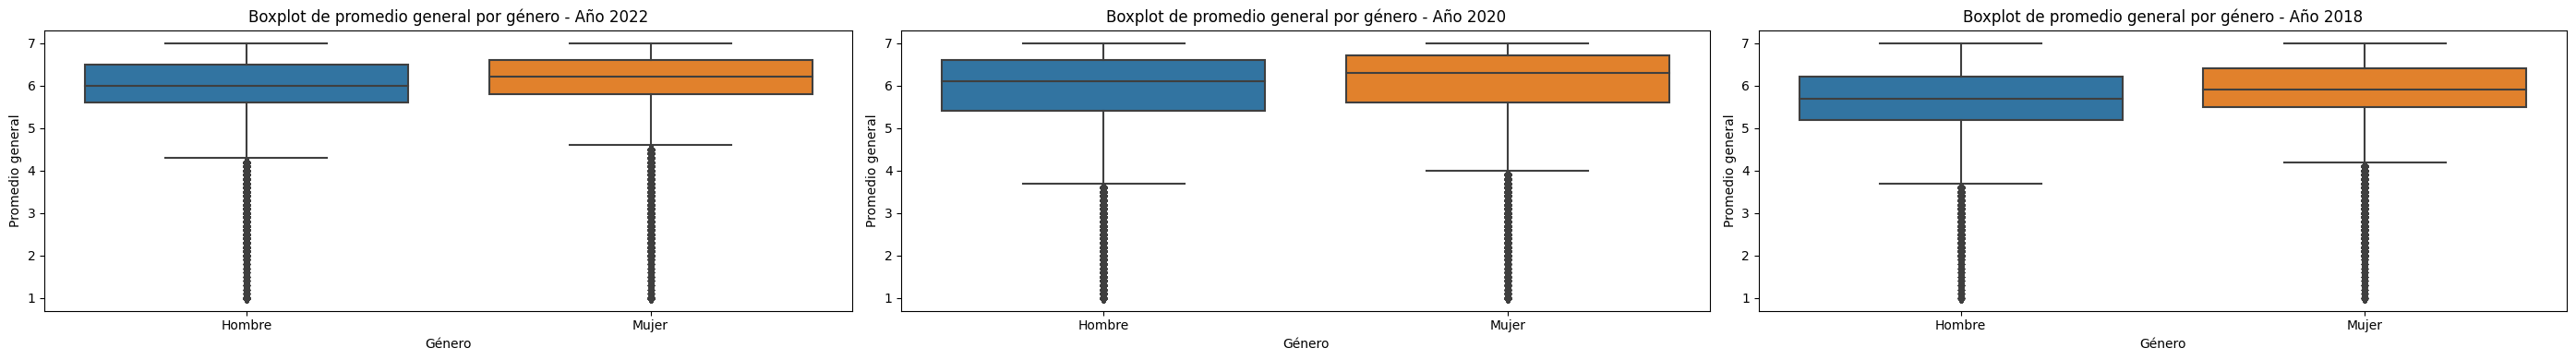

In [ ]:
dataframes = [(r_2022, '2022'), (r_2020, '2020'), (r_2018, '2018')]
fig, axes = plt.subplots(1, len(dataframes), figsize=(28,4))

for i, (df, df_name) in enumerate(dataframes):
    grouped = df.groupby('GEN_ALU')

    data = []

    for name, group in grouped:
        data.append(group['PROM_GRAL'])

    ax = axes[i] if len(dataframes) > 1 else axes
    sns.boxplot(data=data, ax=ax)
    ax.set_xticklabels(['Hombre', 'Mujer'])
    ax.set_xlabel('Género')
    ax.set_ylabel('Promedio general')
    ax.set_title(f'Boxplot de promedio general por género - Año {df_name}')

plt.tight_layout()
plt.show()

A partir de estos boxplots se puede apreciar que existe una tendencia a mejores notas por parte de las mujeres en todos los años graficados, aunque la diferencia es ligera. Además para ambos géneros las distribuciones son relativamente similares.

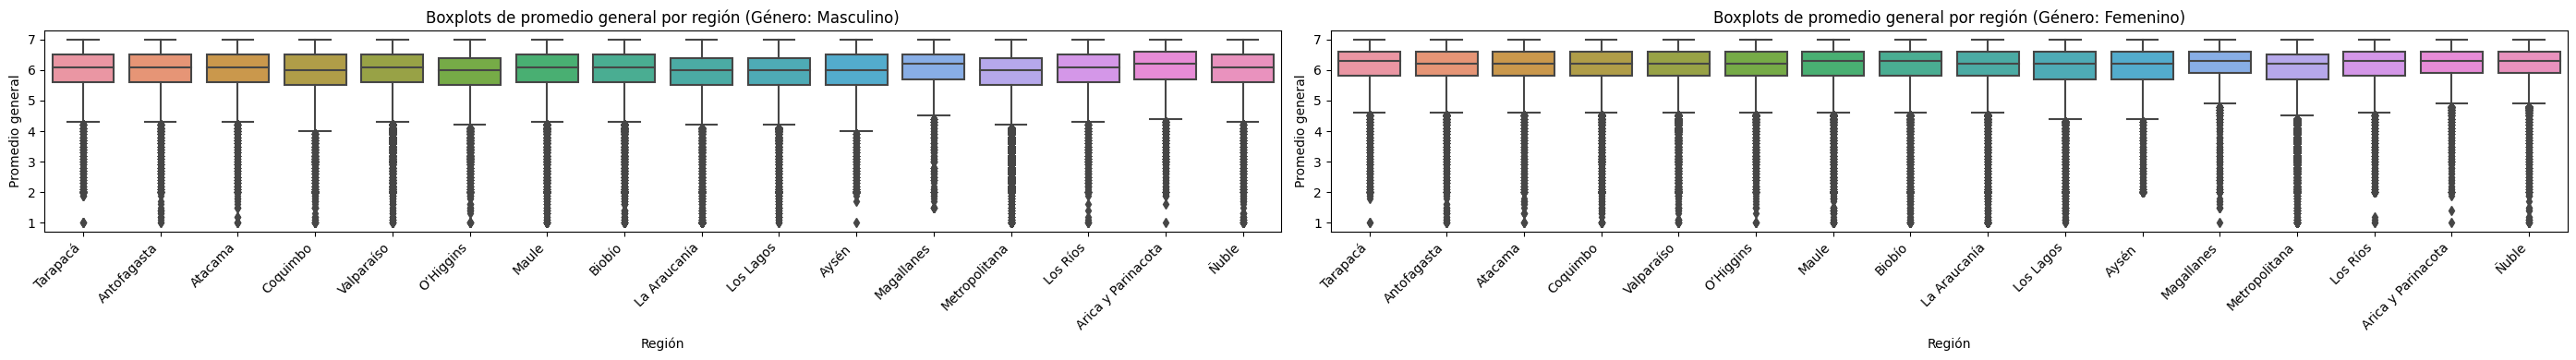

In [ ]:
regiones_chile = {
    1: 'Tarapacá',
    2: 'Antofagasta',
    3: 'Atacama',
    4: 'Coquimbo',
    5: 'Valparaíso',
    6: 'O’Higgins',
    7: 'Maule',
    8: 'Biobío',
    9: 'La Araucanía',
    10: 'Los Lagos',
    11: 'Aysén ',
    12: 'Magallanes',
    13: 'Metropolitana',
    14: 'Los Ríos',
    15: 'Arica y Parinacota',
    16: 'Ñuble'
}

grouped = r_2022.groupby(['GEN_ALU', 'COD_REG_RBD'])
data = []

for name, group in grouped:
    data.append(group['PROM_GRAL'])

# Gráfico para etiquetas "Masculino"
fig, axs = plt.subplots(1, 2, figsize=(28,4))

masculino_data = [group['PROM_GRAL'] for name, group in grouped if name[0] == 1]
labels_masculino = [regiones_chile[name[1]] for name, group in grouped if name[0] == 1]

sns.boxplot(data=masculino_data, ax=axs[0])
axs[0].set_xticklabels(labels_masculino, rotation=45, ha='right')
axs[0].set_xlabel('Región')
axs[0].set_ylabel('Promedio general')
axs[0].set_title('Boxplots de promedio general por región (Género: Masculino)')

# Gráfico para etiquetas "Femenino"
femenino_data = [group['PROM_GRAL'] for name, group in grouped if name[0] == 2]
labels_femenino = [regiones_chile[name[1]] for name, group in grouped if name[0] == 2]

sns.boxplot(data=femenino_data, ax=axs[1])
axs[1].set_xticklabels(labels_femenino, rotation=45, ha='right')
axs[1].set_xlabel('Región')
axs[1].set_ylabel('Promedio general')
axs[1].set_title('Boxplots de promedio general por región (Género: Femenino)')

plt.tight_layout()
plt.show()


Al observar estos boxplots se puede notar inmediatamente que las notas de las estudiantes mujeres son mas regulares a través de todas las regiones del país, mientras que las de los hombres oscilan según la región. Más allá de esto no se puede extraer más información que pueda ser relevante para nuestra investigación.

In [ ]:
prom_hombres_2022=r_2022[r_2022["GEN_ALU"]==1].groupby(['COD_REG_RBD'])["PROM_GRAL"].mean()
prom_mujeres_2022=r_2022[r_2022["GEN_ALU"]==2].groupby(['COD_REG_RBD'])["PROM_GRAL"].mean()

prom_hombres_2020=r_2020[r_2020["GEN_ALU"]==1].groupby(['COD_REG_RBD'])["PROM_GRAL"].mean()
prom_mujeres_2020=r_2020[r_2020["GEN_ALU"]==2].groupby(['COD_REG_RBD'])["PROM_GRAL"].mean()

prom_hombres_2018=r_2018[r_2018["GEN_ALU"]==1].groupby(['COD_REG_RBD'])["PROM_GRAL"].mean()
prom_mujeres_2018=r_2018[r_2018["GEN_ALU"]==2].groupby(['COD_REG_RBD'])["PROM_GRAL"].mean()

regiones_chile = {
    1: 'Región de Tarapacá',
    2: 'Región de Antofagasta',
    3: 'Región de Atacama',
    4: 'Región de Coquimbo',
    5: 'Región de Valparaíso',
    6: 'Región del Libertador General Bernardo O’Higgins',
    7: 'Región del Maule',
    8: 'Región del Biobío',
    9: 'Región de La Araucanía',
    10: 'Región de Los Lagos',
    11: 'Región de Aysén del General Carlos Ibáñez del Campo',
    12: 'Región de Magallanes y de la Antártica Chilena',
    13: 'Región Metropolitana de Santiago',
    14: 'Región de Los Ríos',
    15: 'Región de Arica y Parinacota',
    16: 'Región de Ñuble'
}

In [ ]:
prom_hombres_list=[prom_hombres_2022,prom_hombres_2020,prom_hombres_2018]
prom_mujeres_list=[prom_mujeres_2022,prom_mujeres_2020,prom_mujeres_2018]
anios=[2022,2020,2018]

In [ ]:
def plot_promedio_genero(prom_hombres_list, prom_mujeres_list, years):
    fig, axs = plt.subplots(1, 3, figsize=(28, 4), sharey=True)

    width = 0.4
    colors = ['palevioletred', 'mediumturquoise']
    regiones_chile = {1: 'Arica y Parinacota', 2: 'Tarapacá', 3: 'Antofagasta', 4: 'Atacama', 5: 'Coquimbo', 6: 'Valparaíso', 7: 'Metropolitana', 8: 'O\'Higgins', 9: 'Maule', 10: 'Ñuble', 11: 'Biobío', 12: 'Araucanía', 13: 'Los Ríos', 14: 'Los Lagos', 15: 'Aysén', 16: 'Magallanes'}

    for i, year in enumerate(years):
        prom_hombres = prom_hombres_list[i]
        prom_mujeres = prom_mujeres_list[i]

        axs[i].bar(np.arange(1, len(prom_hombres) + 1) - width / 2, prom_hombres.values, width=width, label="Masculino", color=colors[0])
        axs[i].bar(np.arange(1, len(prom_mujeres) + 1) + width / 2, prom_mujeres.values, width=width, label="Femenino", color=colors[1])

        for j, v in enumerate(prom_hombres.values):
            axs[i].text(j+1-width/2, v+0.03, str(round(v,2)), color='black', fontweight='bold', ha='center')

        for j, v in enumerate(prom_mujeres.values):
            axs[i].text(j+1+width/2, v+0.03, str(round(v,2)), color='black', fontweight='bold', ha='center')

        axs[i].set_title(f"Año {year}")
        axs[i].set_xlabel("Región")
        axs[i].set_ylim([5.5, 6.5])
        axs[i].legend(loc='upper right')
        axs[i].grid(axis='y', color='gray', linestyle='dashed')

        regiones = prom_hombres.index.map(regiones_chile)
        axs[i].set_xticks(np.arange(1,len(regiones)+1))
        axs[i].set_xticklabels(regiones, rotation=45, ha='right')

    fig.suptitle("Promedio de estudiantes de género masculino y femenino por región")
    axs[0].set_ylabel("Promedio")

    plt.show()


* Grafico de barras de promedios generales según genero a traves de los 3 años estudiados:

Es notable apreciar el aumento de promedios generales en todas las regiones desde 2018(pre-pandemia) a 2020(pandemia) y 2022(post-pandemia).

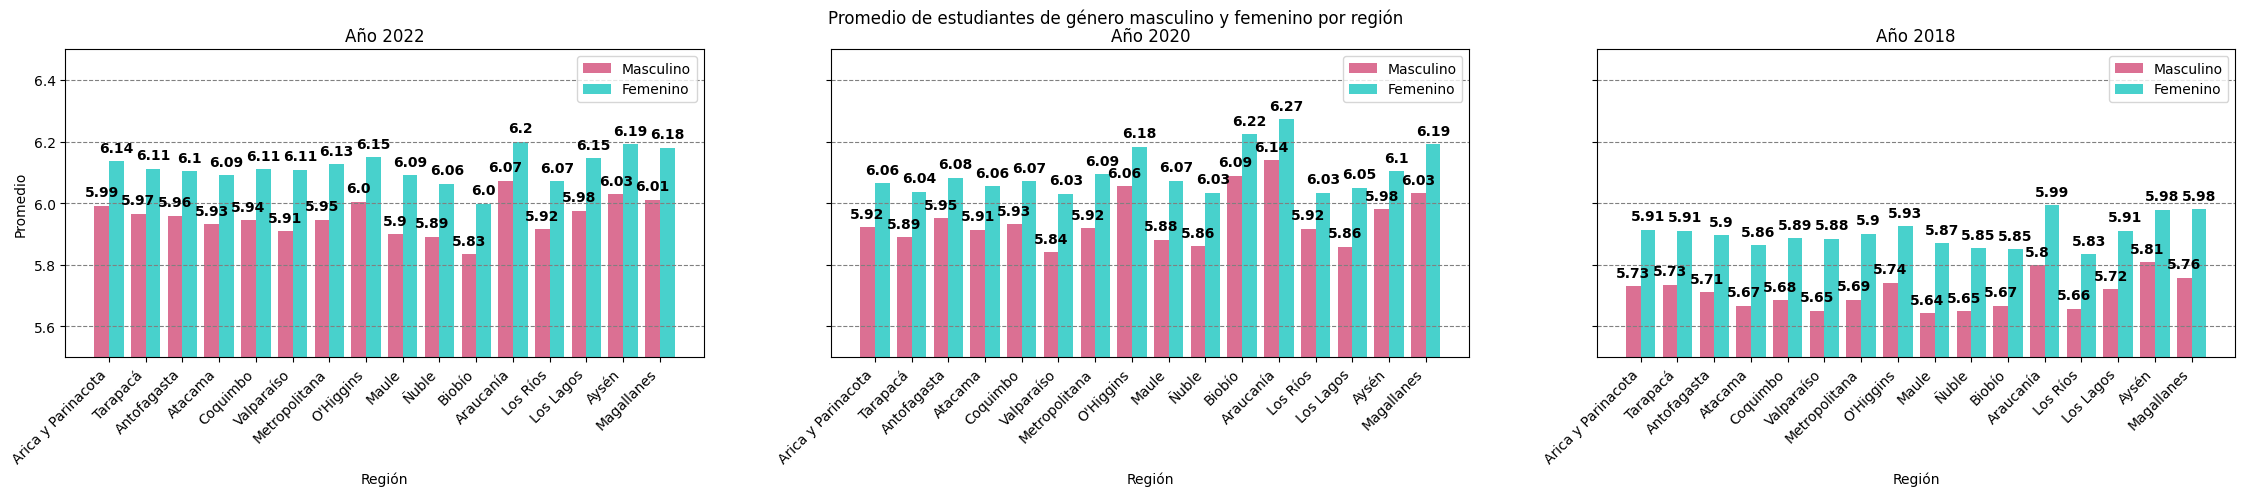

In [ ]:
plot_promedio_genero(prom_hombres_list, prom_mujeres_list, anios)

#### **Gráfica de asistencia promedio por región diferenciados por indice de ruralidad del establecimiento**

Un factor que se presume razonablemente que afecta significativamente el rendimiento académico es la asistencia a clases de los estudiantes. La ruralidad es un desafío importante para la asistencia, ya que afecta los medios de transporte disponibles y la proximidad a los establecimientos educativos. Por lo tanto, es necesario analizar su efecto en la asistencia estudiantil.

Se observa que, en los tres años, tanto en zonas rurales como urbanas, la asistencia promedio por región supera el 80%. No hay una diferencia sustancial en la asistencia promedio entre zonas rurales y no rurales.

(La variable RURAL_RBD tiene un valor de 1 si es rural y 0 si es urbano, y las regiones se indican mediante su número, siendo la región 16 Ñuble)

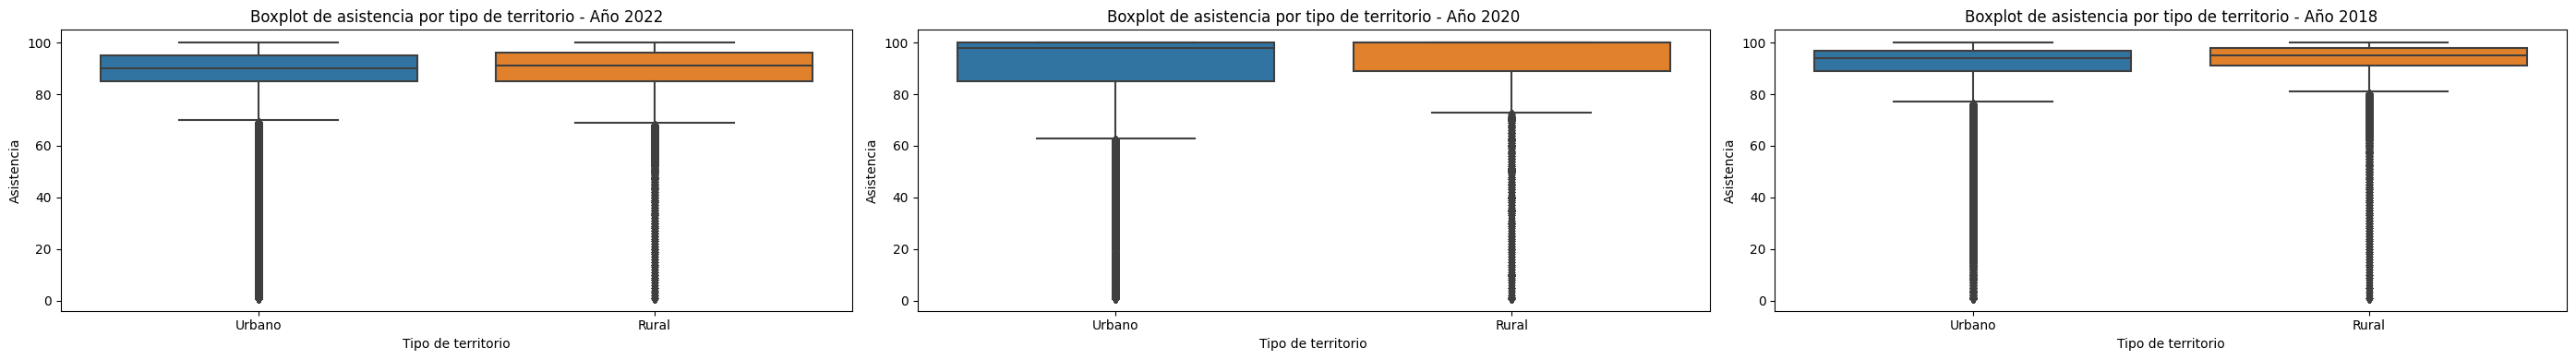

In [ ]:
dataframes = [(r_2022, '2022'), (r_2020, '2020'), (r_2018, '2018')]
fig, axes = plt.subplots(1, len(dataframes), figsize=(28,4))

for i, (df, df_name) in enumerate(dataframes):
    grouped = df.groupby('RURAL_RBD')

    data = []

    for name, group in grouped:
        data.append(group['ASISTENCIA'])

    ax = axes[i] if len(dataframes) > 1 else axes
    sns.boxplot(data=data, ax=ax)
    ax.set_xticklabels(['Urbano', 'Rural'])
    ax.set_xlabel('Tipo de territorio')
    ax.set_ylabel('Asistencia')
    ax.set_title(f'Boxplot de asistencia por tipo de territorio - Año {df_name}')

plt.tight_layout()
plt.show()


Al observar los boxplots de asistencia según el tipo de territorio, se nota que este no tiene una influencia significativa en la asistencia de los alumnos. Tanto en territorio urbano como rural, se observan distribuciones similares, con la excepción del año 2020, donde pueden haber algunas irregularidades debido al contexto de la pandemia.

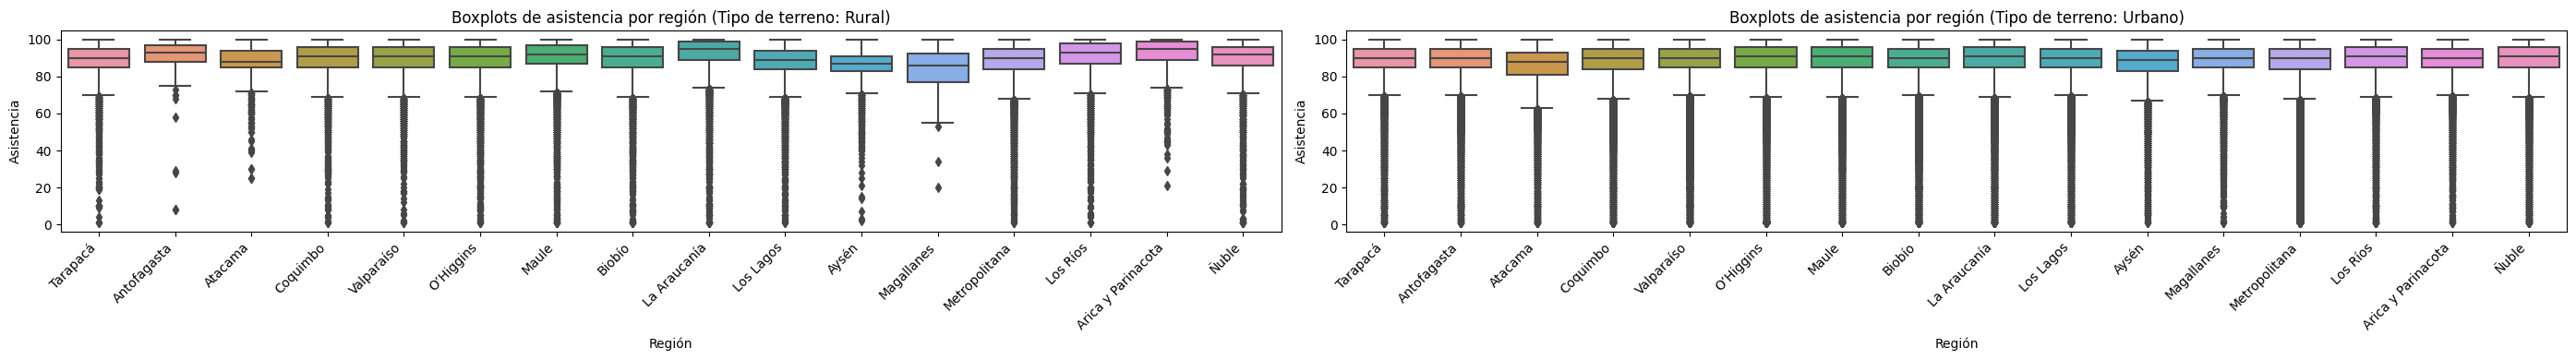

In [ ]:
regiones_chile = {
    1: 'Tarapacá',
    2: 'Antofagasta',
    3: 'Atacama',
    4: 'Coquimbo',
    5: 'Valparaíso',
    6: 'O’Higgins',
    7: 'Maule',
    8: 'Biobío',
    9: 'La Araucanía',
    10: 'Los Lagos',
    11: 'Aysén',
    12: 'Magallanes',
    13: 'Metropolitana',
    14: 'Los Ríos',
    15: 'Arica y Parinacota',
    16: 'Ñuble'
}

grouped = r_2022.groupby(['RURAL_RBD', 'COD_REG_RBD'])
data = []

for name, group in grouped:
    data.append(group['ASISTENCIA'])

# Gráfico para etiquetas "Rural"
fig, axs = plt.subplots(1, 2, figsize=(28,4))

rural_data = [group['ASISTENCIA'] for name, group in grouped if name[0] == 1]
labels_rural = [regiones_chile[name[1]] for name, group in grouped if name[0] == 1]

sns.boxplot(data=rural_data, ax=axs[0])
axs[0].set_xticklabels(labels_rural, rotation=45, ha='right')
axs[0].set_xlabel('Región')
axs[0].set_ylabel('Asistencia')
axs[0].set_title('Boxplots de asistencia por región (Tipo de terreno: Rural)')

# Gráfico para etiquetas "Urbano"
urbano_data = [group['ASISTENCIA'] for name, group in grouped if name[0] == 0]
labels_urbano = [regiones_chile[name[1]] for name, group in grouped if name[0] == 0]

sns.boxplot(data=urbano_data, ax=axs[1])
axs[1].set_xticklabels(labels_urbano, rotation=45, ha='right')
axs[1].set_xlabel('Región')
axs[1].set_ylabel('Asistencia')
axs[1].set_title('Boxplots de asistencia por región (Tipo de terreno: Urbano)')

plt.tight_layout()
plt.show()


En general, los datos para el año 2022 muestran distribuciones similares en cuanto a la asistencia por tipo de territorio. Sin embargo, existen algunas excepciones. En la Región de Magallanes y de la Antártica Chilena, se observa una menor asistencia en áreas rurales en comparación con las áreas urbanas. Por otro lado, en la región de Los Lagos, se puede observar una mayor asistencia en áreas rurales en comparación con las áreas urbanas.

In [ ]:
rural_2022 = r_2022[r_2022['RURAL_RBD']== 1] #1 = rural
no_rural_2022 = r_2022[r_2022['RURAL_RBD'] != 1] #0 = urbano

rural_2020 = r_2020[r_2020['RURAL_RBD']== 1]
no_rural_2020 = r_2020[r_2020['RURAL_RBD'] != 1]

rural_2018 = r_2018[r_2018['RURAL_RBD']== 1]
no_rural_2018 = r_2018[r_2018['RURAL_RBD'] != 1]

rural_mean_reg_2022 = rural_2022.groupby(['COD_REG_RBD'])['ASISTENCIA'].mean()
no_rural_mean_reg_2022 = no_rural_2022.groupby(['COD_REG_RBD'])['ASISTENCIA'].mean()

rural_mean_reg_2020 = rural_2020.groupby(['COD_REG_RBD'])['ASISTENCIA'].mean()
no_rural_mean_reg_2020 = no_rural_2020.groupby(['COD_REG_RBD'])['ASISTENCIA'].mean()

rural_mean_reg_2018 = rural_2018.groupby(['COD_REG_RBD'])['ASISTENCIA'].mean()
no_rural_mean_reg_2018 = no_rural_2018.groupby(['COD_REG_RBD'])['ASISTENCIA'].mean()

new_columns =  ['Rural', 'No rural']

asistencia_2022 = pd.concat([rural_mean_reg_2022, no_rural_mean_reg_2022], axis = 1)
asistencia_2022.columns = new_columns
asistencia_2020 = pd.concat([rural_mean_reg_2020, no_rural_mean_reg_2020], axis = 1)
asistencia_2020.columns = new_columns
asistencia_2018 = pd.concat([rural_mean_reg_2018, no_rural_mean_reg_2018], axis = 1)
asistencia_2018.columns = new_columns

def plot_asistencia_por_ruralidad(asistencia1, asistencia2, asistencia3, año1, año2, año3):
    fig, axs = plt.subplots(1, 3, figsize=(28, 4))

    asistencia1.plot(kind='bar', color=['palevioletred', 'mediumturquoise'], ax=axs[0])
    axs[0].set_title('Asistencia promedio por índice de ruralidad, año ' + str(año1))
    axs[0].set_xlabel('Región')
    axs[0].set_ylabel('Porcentaje de asistencia')
    axs[0].set_ylim([60, 100])
    axs[0].grid(axis='y', color='gray', linestyle='dashed')
    regiones1 = asistencia1.index.map(regiones_chile)
    axs[0].set_xticks(np.arange(1, len(regiones1) + 1))
    axs[0].set_xticklabels(regiones1, rotation=45, ha='right')
    axs[0].legend(loc='best')

    asistencia2.plot(kind='bar', color=['palevioletred', 'mediumturquoise'], ax=axs[1])
    axs[1].set_title('Asistencia promedio por índice de ruralidad, año ' + str(año2))
    axs[1].set_xlabel('Región')
    axs[1].set_ylabel('Porcentaje de asistencia')
    axs[1].set_ylim([60, 100])
    axs[1].grid(axis='y', color='gray', linestyle='dashed')
    regiones2 = asistencia2.index.map(regiones_chile)
    axs[1].set_xticks(np.arange(1, len(regiones2) + 1))
    axs[1].set_xticklabels(regiones2, rotation=45, ha='right')
    axs[1].legend(loc='best')

    asistencia3.plot(kind='bar', color=['palevioletred', 'mediumturquoise'], ax=axs[2])
    axs[2].set_title('Asistencia promedio por índice de ruralidad, año ' + str(año3))
    axs[2].set_xlabel('Región')
    axs[2].set_ylabel('Porcentaje de asistencia')
    axs[2].set_ylim([60, 100])
    axs[2].grid(axis='y', color='gray', linestyle='dashed')
    regiones3 = asistencia3.index.map(regiones_chile)
    axs[2].set_xticks(np.arange(1, len(regiones3) + 1))
    axs[2].set_xticklabels(regiones3, rotation=45, ha='right')
    axs[2].legend(loc='best')

    plt.show()


* Grafico de barras de promedios de asitencia según ruralidad a traves de los 3 años estudiados:

En general no es posible apreciar tendencias significativas, aún así comparando dos años presenciales, durante 2018 la asistencia general promedio fue superior que en 2022.

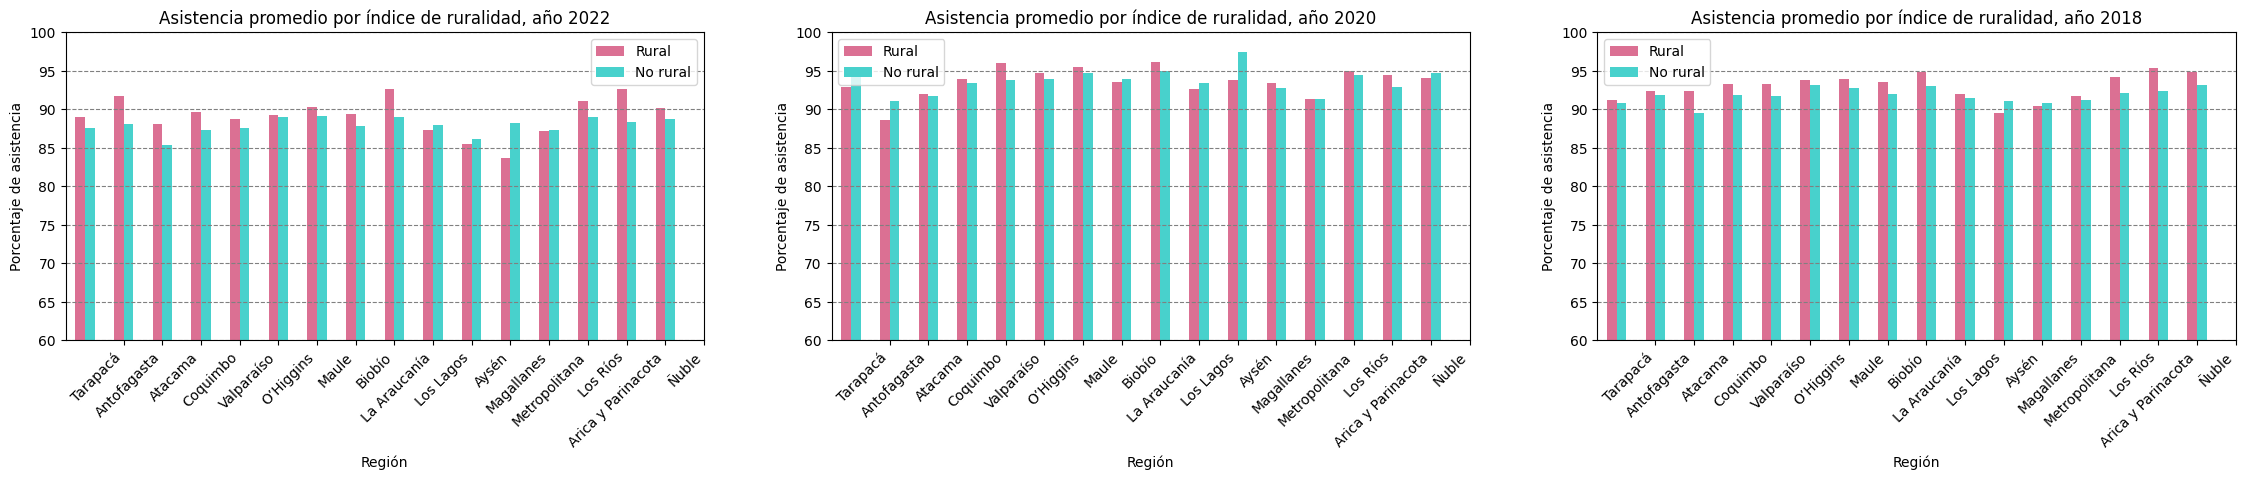

In [ ]:
plot_asistencia_por_ruralidad(asistencia_2022, asistencia_2020, asistencia_2018, 2022,2020,2018)

#### Otros graficos: 1. Promedio por tipo de establecimiento - 2. Por tipo de jornada - 3. Por tipo de enseñanza  - 4. Por situación final.

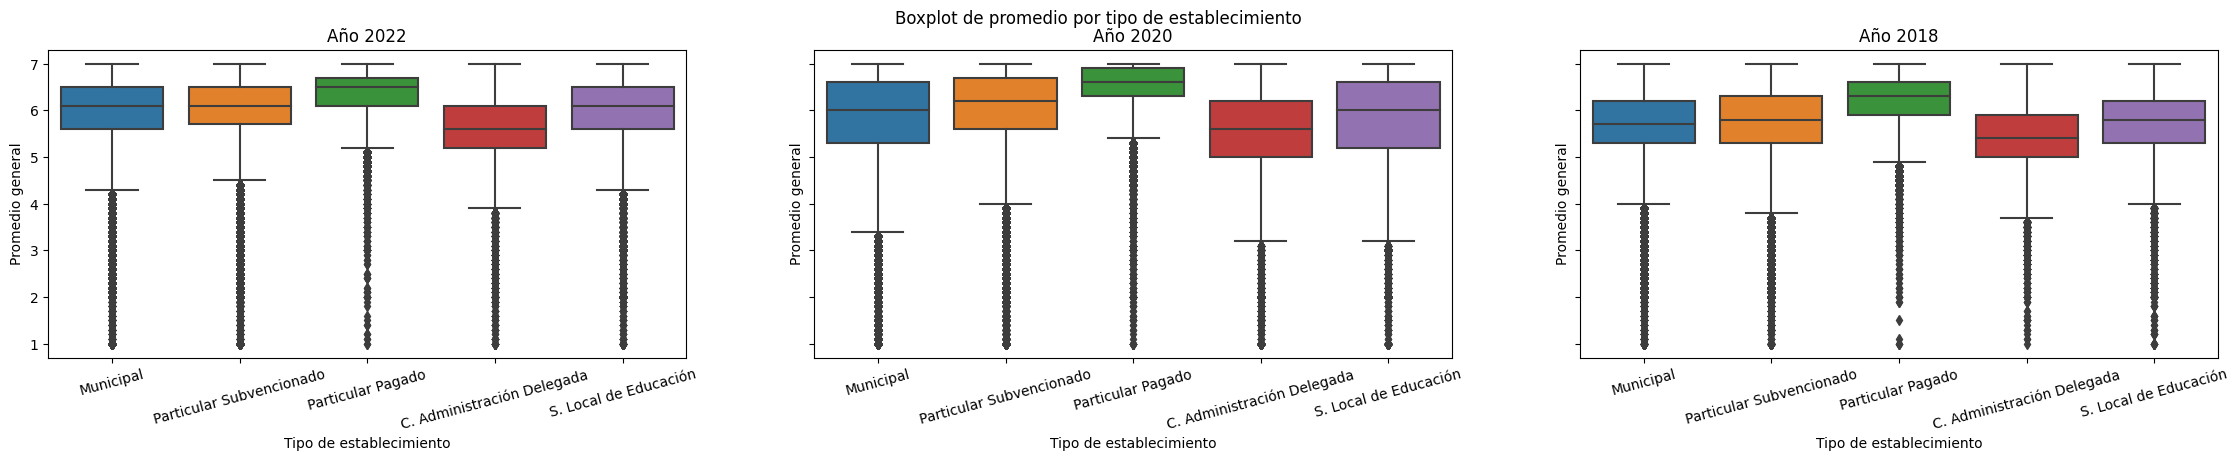

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

dataframes = [(r_2022, '2022'), (r_2020, '2020'), (r_2018, '2018')]

fig, axes = plt.subplots(1, len(dataframes), figsize=(28, 4), sharey='row', gridspec_kw={'hspace': 0.8})

# Títulos de las filas
row_titles = ['Tipo de establecimiento', 'Tipo de jornada', 'Tipo de enseñanza', 'Situación final']
years = [df_name for _, df_name in dataframes]

# Boxplots por tipo de establecimiento
for i, (df, df_name) in enumerate(dataframes):
    grouped = df.groupby('COD_DEPE2')
    data = []
    for name, group in grouped:
        data.append(group['PROM_GRAL'])
    ax = axes[i]
    sns.boxplot(data=data, ax=ax)
    ax.set_xticklabels(['Municipal', 'Particular Subvencionado', 'Particular Pagado', 'C. Administración Delegada', 'S. Local de Educación'], rotation=15)
    ax.set_xlabel('Tipo de establecimiento')
    ax.set_ylabel('Promedio general')
    ax.set_title(f'Año {df_name}')

# Subtítulo de la primera fila de gráficos
fig.suptitle('Boxplot de promedio por tipo de establecimiento')

# Ajustar los espacios entre los subgráficos
plt.tight_layout()

# Mostrar la figura
plt.show()



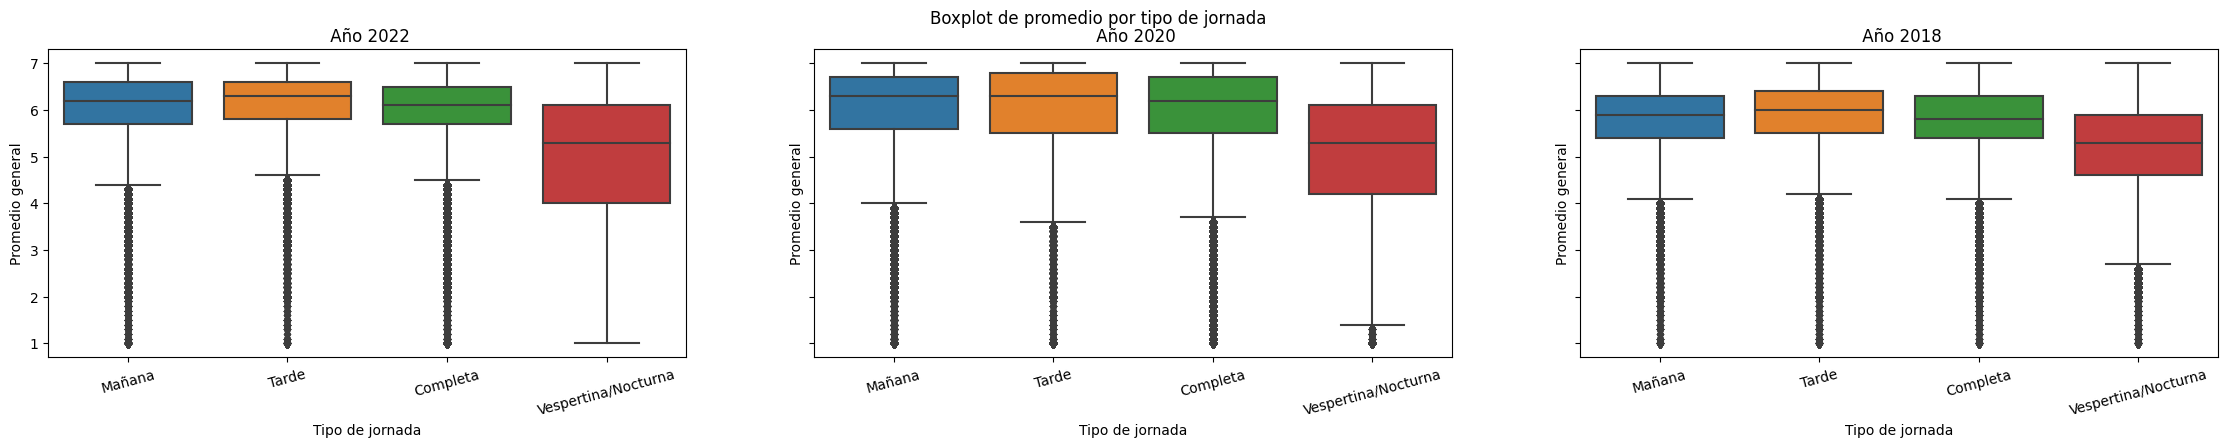

In [ ]:
dataframes = [(r_2022, '2022'), (r_2020, '2020'), (r_2018, '2018')]

fig, axes = plt.subplots(1, len(dataframes), figsize=(28, 4), sharey='row', gridspec_kw={'hspace': 0.8})

# Títulos de las filas
row_titles = ['Tipo de establecimiento', 'Tipo de jornada', 'Tipo de enseñanza', 'Situación final']
years = [df_name for _, df_name in dataframes]

# Boxplots por tipo de jornada
for i, (df, df_name) in enumerate(dataframes):
    grouped = df.groupby('COD_JOR')
    data = []
    for name, group in grouped:
        data.append(group['PROM_GRAL'])
    ax = axes[i] if len(dataframes) > 1 else axes[1]
    sns.boxplot(data=data, ax=ax)
    ax.set_xticklabels(['Mañana', 'Tarde', 'Completa', 'Vespertina/Nocturna'], rotation=15)
    ax.set_xlabel('Tipo de jornada')
    ax.set_ylabel('Promedio general')
    ax.set_title(f' Año {df_name}')

# Subtítulo de la segunda fila de gráficos
fig.suptitle('Boxplot de promedio por tipo de jornada')
plt.tight_layout()
plt.show()


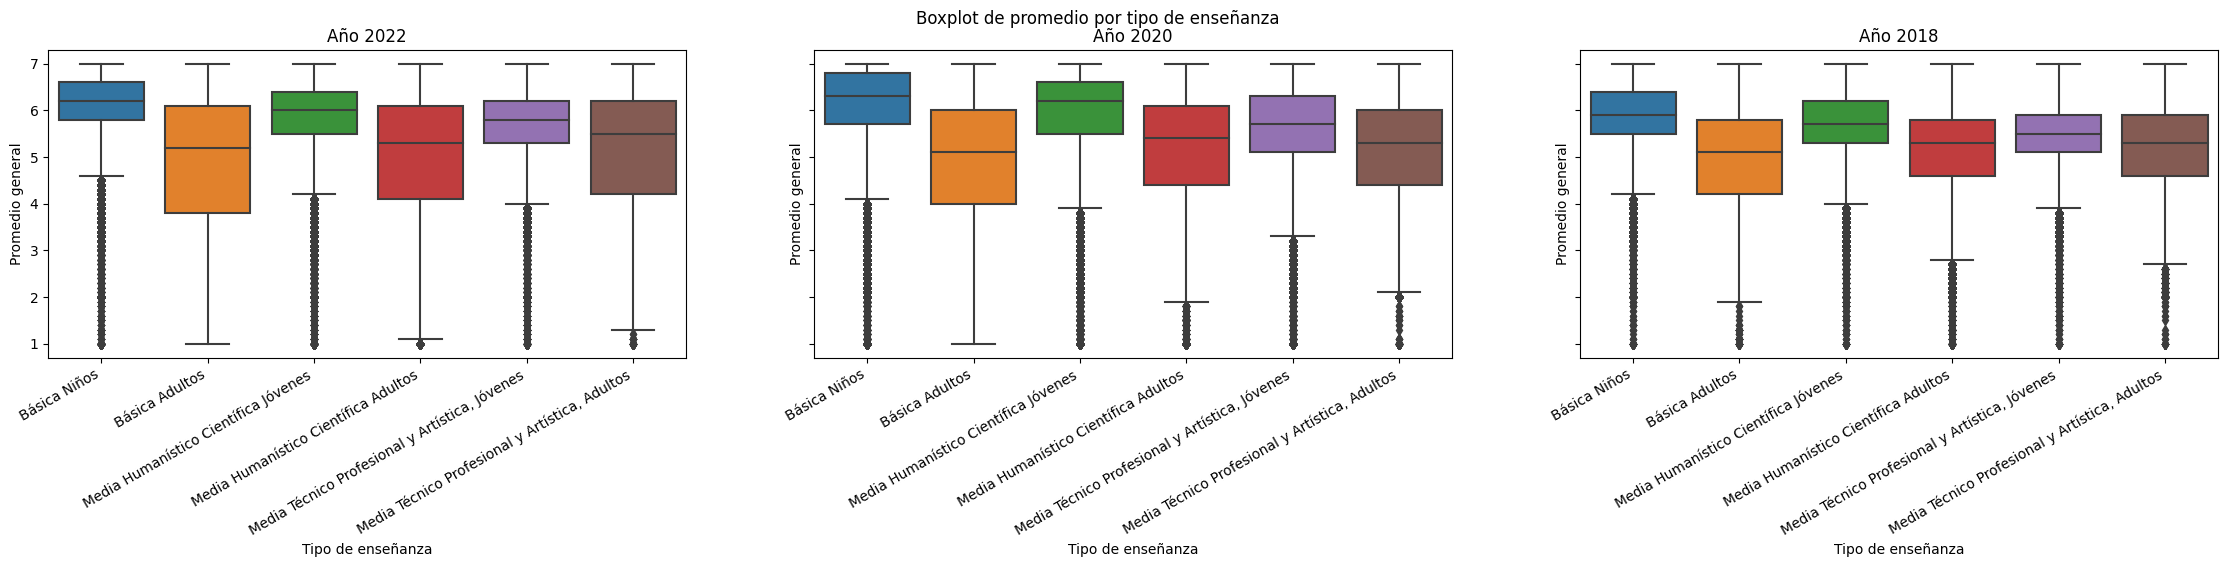

In [ ]:
dataframes = [(r_2022, '2022'), (r_2020, '2020'), (r_2018, '2018')]

fig, axes = plt.subplots(1, len(dataframes), figsize=(28, 4), sharey='row', gridspec_kw={'hspace': 0.8})

# Títulos de las filas
row_titles = ['Tipo de establecimiento', 'Tipo de jornada', 'Tipo de enseñanza', 'Situación final']
years = [df_name for _, df_name in dataframes]

# Boxplots por tipo de enseñanza
for i, (df, df_name) in enumerate(dataframes):
    grouped = df.groupby('COD_ENSE2')
    data = []
    for name, group in grouped:
        data.append(group['PROM_GRAL'])
    ax = axes[i] if len(dataframes) > 1 else axes[2]
    sns.boxplot(data=data, ax=ax)
    ax.set_xticklabels(['Básica Niños', 'Básica Adultos', 'Media Humanístico Científica Jóvenes', 'Media Humanístico Científica Adultos','Media Técnico Profesional y Artística, Jóvenes','Media Técnico Profesional y Artística, Adultos'], rotation=30, ha='right')
    ax.set_xlabel('Tipo de enseñanza')
    ax.set_ylabel('Promedio general')
    ax.set_title(f'Año {df_name}')

# Subtítulo de la tercera fila de gráficos
fig.suptitle('Boxplot de promedio por tipo de enseñanza')
plt.tight_layout()
plt.show()


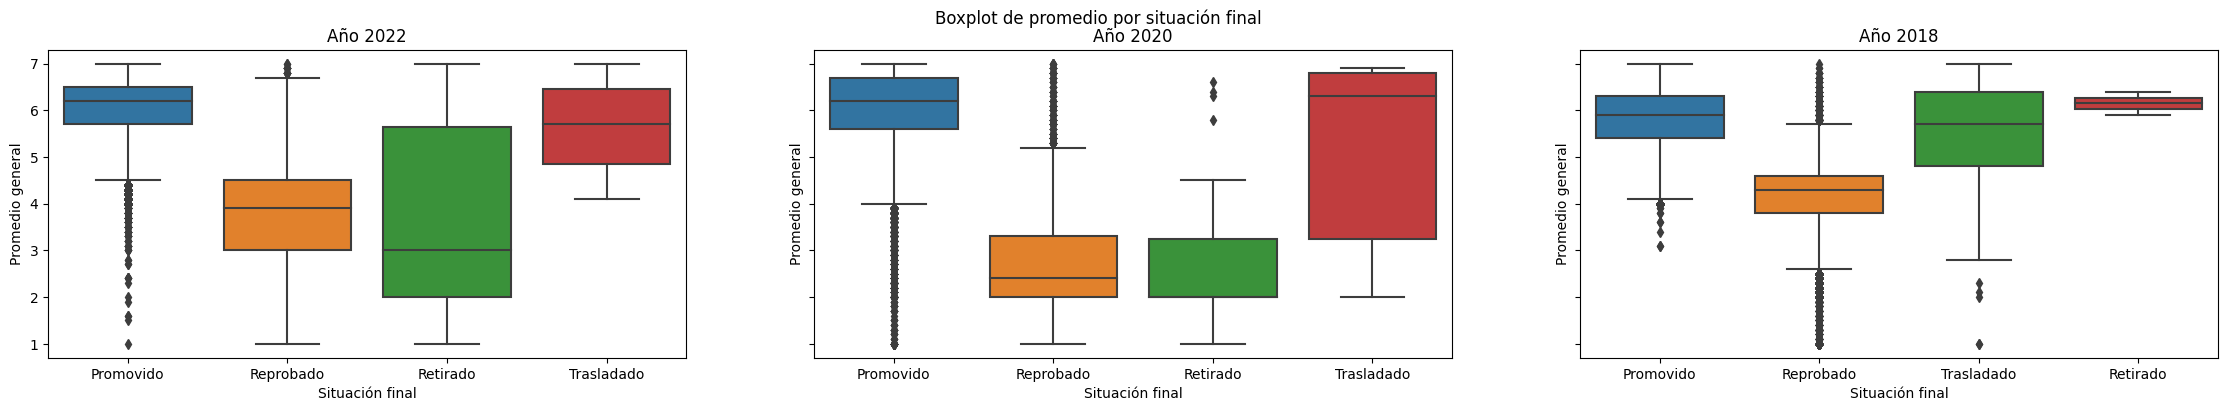

In [ ]:
dataframes = [(r_2022, '2022'), (r_2020, '2020'), (r_2018, '2018')]

fig, axes = plt.subplots(1, len(dataframes), figsize=(28, 4), sharey='row', gridspec_kw={'hspace': 0.8})

# Títulos de las filas
row_titles = ['Tipo de establecimiento', 'Tipo de jornada', 'Tipo de enseñanza', 'Situación final']
years = [df_name for _, df_name in dataframes]

situacion = {"P": "Promovido", "R": "Reprobado", "Y": "Retirado", "T": "Trasladado"}

# Boxplots por situación final
for i, (df, df_name) in enumerate(dataframes):
    grouped = df.groupby('SIT_FIN_R')
    data = []
    for name, group in grouped:
        data.append(group['PROM_GRAL'])
    ax = axes[i] if len(dataframes) > 1 else axes[3]
    sns.boxplot(data=data, ax=ax)
    ax.set_xticklabels([situacion[x] for x in df['SIT_FIN_R'].unique()])
    ax.set_xlabel('Situación final')
    ax.set_ylabel('Promedio general')
    ax.set_title(f'Año {df_name}')

# Subtítulo de la cuarta fila de gráficos
fig.suptitle('Boxplot de promedio por situación final')
plt.tight_layout()
plt.show()

## Observaciones de los boxplots
* Promedio por tipo de establecimiento: Los colegios particulares pagados tienden a tener una varianza más pequeña y mayor cantidad de outliers en comparación con otros establecimientos, en los tres años. Los colegios subvencionados muestran una distribución simétrica en general, excepto en el año 2020 durante la pandemia, donde los datos se concentran en promedios más bajos. Además, los colegios de administración delegada tienen las medianas más bajas, mientras que los particulares pagados tienen las más altas.

* Promedio por tipo de jornada: La jornada vespertina/nocturna presenta promedios inferiores en comparación con las demás jornadas. Las jornadas de mañana, tarde y completa muestran varianzas similares y pequeñas, con pequeñas variaciones en simetría año tras año.

* Promedio por tipo de enseñanza: En cuanto al tipo de enseñanza, los promedios generales en la educación de adultos para todos los niveles son inferiores a los de jóvenes y niños, destacando la educación básica para niños como la de mejores promedios. La mayoría de las enseñanzas muestran asimetría negativa, en los tres años.

* Promedio por tipo de situación final: Los alumnos reprobados muestran una distribución con promedios inferiores en comparación con los demás tipos. Es notable la alta varianza en los datos de traslados en 2022, en comparación con los otros dos años, así como en los datos de alumnos retirados en 2020.

## **3. Preguntas y Problemas**

### **3.1 Preguntas**
Las preguntas formuladas son las siguientes:

| **Inicialmente antes de la exploración de datos:**                                                      | **Luego de la exploración de datos y la reformulación:**                                                |
|-----------------------------------------------------------------------------------------------------------|-------------------------------------------------------------------------------------------------------|
| 1. ¿Existe correlación entre el desempeño escolar y el género del estudiante?                            | 1. ¿Existen factores que influyen más en el promedio general del estudiante? ¿Es la región una de ellas? |
| 2. ¿Es el rendimiento escolar dependiente de la asistencia?                                             | 2. ¿Es posible predecir qué estudiante tendrá un mejor rendimiento a lo largo de los años? ¿Cuáles son las variables más relevantes? |
| 3. ¿Qué tan significativo es la jornada para determinar el rendimiento estudiantil?                      | 3. ¿Los colegios con mayor equidad en distribución entre hombres y mujeres tienen mejores rendimiento?  |


### **3.2 Problemas**

| Descripción                                                                                            |
|--------------------------------------------------------------------------------------------------------|
| Datos de asistencia, género y promedio anual sin información tuvieron que ser eliminados, pero la dimensionalidad se redujo muy poco.                                                                                                               |
| Datos numéricos que venían como "strings" dificultaban la utilización de funciones, es decir, el número 1 venía como 1 y como "1".                                                                                                                  |
| Variables a utilizar no se encontraban en todos los datasets, es decir, para el año 2012 faltaba la variable "EDAD_ALU" y no pudo ser utilizado.                                                                                                 |
| Cantidad de outliers visibles en los gráficos de boxplot.                                                                                                               |




In [ ]:
# Calculamos los outliers para los otros 10 atributos.

columnas = ['COD_ENSE2', 'COD_REG_RBD', 'COD_COM_ALU', 'GEN_ALU', 'PROM_GRAL', 'ASISTENCIA', 'RURAL_RBD', 'EDAD_ALU', 'COD_JOR', 'COD_DEPE2']

for columna in columnas:
    Q1 = r_2018[columna].quantile(0.25)
    Q3 = r_2018[columna].quantile(0.75)
    RI = Q3 - Q1
    limite_inferior = Q1 - 1.5 * RI
    limite_superior = Q3 + 1.5 * RI
    outliers = r_2018[(r_2018[columna] < limite_inferior) | (r_2018[columna] >  limite_superior)]
    cantidad_outliers = len(outliers)
    #print(f"Atributo: {columna}, Cantidad de outliers: {cantidad_outliers}")

#Notando que el total por atributo es bajo considerando la cantidad total de filas del dataset.

| Atributo             | COD_ENSE2 | COD_REG_RBD | COD_COM_ALU | GEN_ALU | PROM_GRAL | ASISTENCIA | RURAL_RBD | EDAD_ALU | COD_JOR | COD_DEPE2 |
|----------------------|-----------|-------------|-------------|---------|-----------|------------|-----------|----------|---------|-----------|
| Cantidad de outliers | 0         | 0           | 0           | 0       | 28402     | 138499     | 236740    | 39266    | 0       | 93167     |


# **Hito 3**

* Fue agregado el dataset de evaluación docente de 2018(definido como e_2018), obtenido del mismo sitio web de MINEDUC. Se encuentren solo disponibles datos de 2021 y años anteriores.

In [ ]:
gdown.download('https://datosabiertos.mineduc.cl/wp-content/uploads/2021/12/Evaluacion-Docente-2018.zip',quiet=True)
!unzip '/content/Evaluacion-Docente-2018.zip' -d '/content/evaluacion/'
!rm '/content/evaluacion/ER_Evaluación_Docente_PUBL_CLAVE.pdf'


e_2018=pd.read_csv('/content/evaluacion/20200110_EVALUACION_DOCENTE_2018_10052019_PUBL.csv',sep=';')

#Fueron seleccionadas 10 columnas, elimimando aquellas con información redundante.
e_2018=e_2018[['RBD','DOC_GENERO','NIVEL','AE_PJE','EP_PJE','IRT_PJE','PF_PJE','PF_ESC','INSTR_PJE','CCE_ESC']]


# Convertir las columnas a enteros
columnas_enteros = ["DOC_GENERO", "NIVEL", "AE_PJE", "EP_PJE", "IRT_PJE", "PF_PJE", "INSTR_PJE"]
e_2018[columnas_enteros] = e_2018[columnas_enteros].replace(',', '.', regex=True)
e_2018[columnas_enteros] = e_2018[columnas_enteros].astype(float)


Archive:  /content/Evaluacion-Docente-2018.zip
  inflating: /content/evaluacion/20200110_EVALUACION_DOCENTE_2018_10052019_PUBL.csv  
  inflating: /content/evaluacion/ER_Evaluación_Docente_PUBL_CLAVE.pdf  


Visualziación del dataset e_2018, este contiene muchas variables de las cuales fueron elegidas las siguientes:

['RBD','DOC_GENERO','NIVEL','AE_PJE','EP_PJE','IRT_PJE','PF_PJE','PF_ESC','INSTR_PJE','CCE_ESC']

Debido a que creemos son las más relevantes para efectos del experimento, cabe destacar que hay varias evaluaciones por colegio por lo que se debe de obtener un promedio de evaluaciones por colegio. Además se filtrará por nivel en que hacen clases, el cual será eduación media y por establecimiento municipal ya que son mayoria.

In [ ]:
#Visualziación del dataset e_2018:

e_2018

,RBD,DOC_GENERO,NIVEL,AE_PJE,EP_PJE,IRT_PJE,PF_PJE,PF_ESC,INSTR_PJE,CCE_ESC
0,1,1.0,7.0,4.0,3.0,3.0,2.23,B,2.64,C
1,1,1.0,6.0,4.0,3.0,4.0,2.40,B,2.84,C
2,1,2.0,4.0,4.0,3.0,3.0,2.58,C,2.85,D
3,1,1.0,7.0,4.0,3.0,2.0,2.52,C,2.71,C
4,1,1.0,4.0,4.0,2.0,3.0,1.80,I,2.18,B
...,...,...,...,...,...,...,...,...,...,...
22040,40429,2.0,5.0,3.0,2.0,3.0,2.05,B,2.23,B
22041,40429,1.0,6.0,4.0,3.0,4.0,1.75,I,2.45,B
22042,40429,2.0,7.0,4.0,2.0,3.0,2.09,B,2.35,B
22043,40429,1.0,6.0,3.0,2.0,3.0,1.85,I,2.11,B


ESTOS SON TODOS LOS ALUMNOS EN EST MUNICIPALES Y EN ED MEDIA

In [ ]:
r_2018_ = r_2018[(r_2018['COD_DEPE2'] == 1) & (r_2018['COD_ENSE2'].isin([5, 6, 7, 8]))] # ESTOS SON TODOS LOS ALUMNOS EN EST MUNICIPALES Y EN ED MEDIA
r_2018_

,RBD,COD_ENSE2,COD_REG_RBD,COD_COM_ALU,GEN_ALU,PROM_GRAL,ASISTENCIA,RURAL_RBD,EDAD_ALU,COD_JOR,COD_DEPE2,SIT_FIN_R
0,1,8,15,15101,2,6.4,95,0,34.0,4,1,P
1,1,8,15,15101,1,5.3,90,0,52.0,4,1,P
2,1,8,15,15101,2,6.4,97,0,41.0,4,1,P
3,1,8,15,15101,1,6.0,94,0,23.0,4,1,P
4,1,8,15,15101,2,5.8,90,0,39.0,4,1,P
...,...,...,...,...,...,...,...,...,...,...,...,...
2997210,40429,8,1,1101,2,6.2,86,0,23.0,4,1,P
2997211,40429,8,1,1101,2,5.1,49,0,20.0,4,1,P
2997212,40429,8,1,1101,2,5.8,79,0,17.0,4,1,P
2997213,40429,8,1,1101,2,5.7,90,0,28.0,4,1,P


Este es el resultado del "promedio" de las evaluaciones docentes de los profesores de cada colegio

In [ ]:
# Define la función que encapsula el proceso para un valor específico de 'RBD'
def process_for_rbd(rbd_value, e_2018):


    # Filtrar el DataFrame e_2018 para obtener solo los datos correspondientes a un valor específico de 'RBD' y que pertenezcan a educación media
    e_2018_single_rbd = e_2018[(e_2018['RBD'] == rbd_value) & (e_2018['NIVEL'] == 4)]

    # Calcula el promedio de las variables numéricas y redondea al entero más cercano
    numeric_cols = ['AE_PJE', 'EP_PJE', 'IRT_PJE', 'PF_PJE', 'INSTR_PJE']
    mean_values_numeric = e_2018_single_rbd[numeric_cols].mean()

    # Calcula el promedio para las variables discretas utilizando la función personalizada
    def custom_mean_discrete(values):
        # Asigna un valor numérico a cada categoría discreta para poder calcular el promedio
        mapping = {'I': 1, 'B': 2, 'C': 3, 'D': 4, "-1": 0}  # Añade el valor -1 con el valor numérico 1
        # Convierte los valores a su valor numérico correspondiente
        numeric_values = [mapping[val] for val in values]

        # Calcula el promedio numérico
        mean_numeric = sum(numeric_values) // len(numeric_values)

        # Convierte el valor numérico de vuelta a su categoría correspondiente
        for key, value in mapping.items():
            if value == mean_numeric:
                return key

    discrete_cols = ['CCE_ESC', 'PF_ESC']
    mean_values_discrete = e_2018_single_rbd[discrete_cols].apply(custom_mean_discrete)

    # Crea el dataframe resultante con una sola fila
    result_data = [[str(e_2018_single_rbd['RBD'].iloc[0])] + mean_values_numeric.values.tolist() + mean_values_discrete.values.tolist()]
    columns = ['RBD'] + numeric_cols + discrete_cols
    result_df = pd.DataFrame(result_data, columns=columns)

    # Convierte la columna 'RBD' en e_2018_ a tipo int64
    result_df['RBD'] = result_df['RBD'].astype('int64')

    return result_df

# Obtener una lista única de valores de la columna 'RBD'
unique_rbd_values = e_2018['RBD'].unique()

# Crear una lista vacía para almacenar los resultados de cada iteración
all_results = []

# Iterar sobre los valores únicos de 'RBD' y llamar la función process_for_rbd para cada valor
for rbd_value in unique_rbd_values:
    try:
        result_for_rbd = process_for_rbd(rbd_value, e_2018)
        # Agregar el resultado a la lista de resultados
        all_results.append(result_for_rbd)
    except:
        pass

# Concatenar todos los DataFrames en la lista de resultados en un solo DataFrame final
final_result_df = pd.concat(all_results, ignore_index=True)

# Ahora tienes todos los resultados en el DataFrame final_result_df
print(final_result_df)


       RBD  AE_PJE  EP_PJE  IRT_PJE  PF_PJE  INSTR_PJE CCE_ESC PF_ESC
0        1     4.0     2.0      3.0     2.0        3.0       C      B
1        4     4.0     3.0      3.0     2.0        3.0       B      I
2        5     4.0     3.0      3.0     2.0        3.0       C      B
3        7     4.0     3.0      3.0     2.0        3.0       C      B
4        8     4.0     2.0      2.0     2.0        3.0       C      B
..     ...     ...     ...      ...     ...        ...     ...    ...
787  40126     4.0     3.0      3.0     2.0        3.0       B      I
788  40289     4.0     3.0      3.0     2.0        3.0       C      B
789  40301     4.0     3.0      3.0     2.0        3.0       B      B
790  40340     4.0     3.0      2.0     2.0        3.0       B      B
791  40352     4.0     4.0      3.0     2.0        3.0       C      B

[792 rows x 8 columns]


Así será el dataset resultante

In [ ]:
# Se unen los dos Dataset

#solo se incluirán las filas que tienen un valor coincidente en la columna "RBD" en ambos Dataset. Las filas que no tienen un valor coincidente en ambos Dataset serán excluidas del resultado.

df_merged = pd.merge(r_2018_, final_result_df, on='RBD', how='inner')
df_merged

,RBD,COD_ENSE2,COD_REG_RBD,COD_COM_ALU,GEN_ALU,PROM_GRAL,ASISTENCIA,RURAL_RBD,EDAD_ALU,COD_JOR,COD_DEPE2,SIT_FIN_R,AE_PJE,EP_PJE,IRT_PJE,PF_PJE,INSTR_PJE,CCE_ESC,PF_ESC
0,1,8,15,15101,2,6.4,95,0,34.0,4,1,P,4.0,2.0,3.0,2.0,3.0,C,B
1,1,8,15,15101,1,5.3,90,0,52.0,4,1,P,4.0,2.0,3.0,2.0,3.0,C,B
2,1,8,15,15101,2,6.4,97,0,41.0,4,1,P,4.0,2.0,3.0,2.0,3.0,C,B
3,1,8,15,15101,1,6.0,94,0,23.0,4,1,P,4.0,2.0,3.0,2.0,3.0,C,B
4,1,8,15,15101,2,5.8,90,0,39.0,4,1,P,4.0,2.0,3.0,2.0,3.0,C,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304443,40352,7,5,5302,2,5.4,85,0,17.0,3,1,P,4.0,4.0,3.0,2.0,3.0,C,B
304444,40352,7,5,5302,1,4.7,85,0,18.0,3,1,P,4.0,4.0,3.0,2.0,3.0,C,B
304445,40352,7,5,5301,1,5.9,95,0,17.0,3,1,P,4.0,4.0,3.0,2.0,3.0,C,B
304446,40352,7,5,5301,1,4.8,80,0,18.0,3,1,P,4.0,4.0,3.0,2.0,3.0,C,B



## Pregunta 1
 **¿Existen factores que influyen más en el promedio general del estudiante?¿Es la región una de ellas?**


### Propuesta Metodológica y resultado preliminar


Para responder esta pregunta se realizará el siguiente experimento:

Con la creación de un modelo de regresión que pueda lograr buenas predicciones con respecto a las notas que tienen los estudiantes, se puede buscar el peso de cada una de las variables usadas en la predicción de las notas, para así saber que factores son más influyentes a la hora de afectar el promedio general de los y las estudiantes.

Con respecto a la metodología del experimento se pudo notar que debido a la gran cantidad de datos con los que se dispone se tuvo que realizar un sampling de toda la data por problemas de RAM, de este modo se tomaron 1/4 de los datos de forma aleatoria para poder realizar el entrenamiento y testeo del modelo de regresión usado. Luego de esto hubo que hacer algunos cambios a la data, puesto que el atributo "SIT_FIN_R" contenía valores categóricos, por lo que se realizó un mapping para convertirlo en un atributo con valores discretos. Seguido de esto se definen los sets de entrenamiento y prueba con una proporción de 80% - 20% respectivamente para luego crear el modelo de regresión con un algoritmo de Random Forest.

De este modo con el conjunto de prueba se realiza un testeo y se obtiene una métrica de Mean Square Error (MSE) de 0.36, lo que se podría considerar como un error aceptable para los propósitos del experimento, por lo que se utiliza el método "feature_importances_" de Random Forest para poder obtener el peso que tiene cada atributo con respecto a las predicciones del modelo. Aquí se puede apreciar que el atributo con mayor relevancia viene siendo la situación final del alumno, lo que hace mucho sentido, ya que los alumnos que tengan una situación de reprobación van a tener notas bajas, mientras que los alumnos aprobados tendrán generalmente notas más altas, pero este atributo realmente no resulta muy interesante de evaluar, ya que se predice finalmente con el resultado. Luego de este atributo siguen la comuna, la edad y la asistencia, donde el más interesante a priori viene siendo la comuna, ya que a través de gráficos de distribución se puede notar fácilmente que los adultos tienen peores notas que los jóvenes y que las personas con mayor asistencia suelen tener mejores notas. Finalmente se puede notar que la región es un factor muy poco relevante a la hora de influenciar en los promedios, con solo un 3% de peso, mientras que las comunas en las que se encuentren los establecimientos educacionales sí son relevantes a la hora de influir en los promedios de alumnos y alumnas, por lo que respondiendo a la pregunta inicialmente planteada, sí existen factores más influyentes, en este caso la comuna, pero se desconoce de qué manera influye este atributo en los promedios finales, lo que puede plantear otras preguntas investigativas a futuro.


### Desarrollo experimento pregunta 1 (Regresión)

In [ ]:
# Se demora más de 10 min en colab

# Importar las bibliotecas necesarias
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder

# Juntar todos los dataFrames en uno solo
df = pd.concat([r_2018,r_2020,r_2022])
df = df.reset_index(drop = True)
df = df[['COD_ENSE2','COD_REG_RBD','COD_COM_ALU','GEN_ALU','PROM_GRAL','ASISTENCIA','RURAL_RBD','EDAD_ALU','COD_JOR','COD_DEPE2','SIT_FIN_R']]

# Calcular la cantidad de filas para seleccionar (No da la RAM para entrenar con todos los datos)
n = len(df) // 4

# Realizar el muestreo aleatorio
df = df.sample(n=n, random_state=1234)


# Dividir los datos en características y etiqueta
X = df.drop('PROM_GRAL', axis=1)
y = df['PROM_GRAL']

# Definir mapeo de valores categóricos a números
mapping = {'P': 0, 'R': 1, 'Y': 2, 'T': 3}

# Realizar codificación ordinal
X = X.copy()
X['SIT_FIN_R'] = X['SIT_FIN_R'].map(mapping)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)


# Crear el regresor de Random Forest
rf_regressor = RandomForestRegressor()

# Entrenar el regresor
rf_regressor.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = rf_regressor.predict(X_test)

# Calcular el error cuadrático medio (MSE) del modelo
mse = mean_squared_error(y_test, y_pred)
print("Error cuadrático medio del modelo: {:.2f}".format(mse))

Error cuadrático medio del modelo: 0.36


In [ ]:
# Obtener la importancia de las características
importances = rf_regressor.feature_importances_

# Crear un DataFrame con las importancias y los nombres de las características
feature_importances = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances})

# Ordenar las características por importancia descendente
feature_importances = feature_importances.sort_values('Importance', ascending=False)

# Imprimir las características más importantes
print(feature_importances)

       Feature  Importance
9    SIT_FIN_R    0.354332
2  COD_COM_ALU    0.195496
6     EDAD_ALU    0.158881
4   ASISTENCIA    0.141921
8    COD_DEPE2    0.039703
1  COD_REG_RBD    0.034190
7      COD_JOR    0.031112
3      GEN_ALU    0.017378
0    COD_ENSE2    0.014616
5    RURAL_RBD    0.012372


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'SIT_FIN_R'),
  Text(1, 0, 'COD_COM_ALU'),
  Text(2, 0, 'EDAD_ALU'),
  Text(3, 0, 'ASISTENCIA'),
  Text(4, 0, 'COD_DEPE2'),
  Text(5, 0, 'COD_REG_RBD'),
  Text(6, 0, 'COD_JOR'),
  Text(7, 0, 'GEN_ALU'),
  Text(8, 0, 'COD_ENSE2'),
  Text(9, 0, 'RURAL_RBD')])

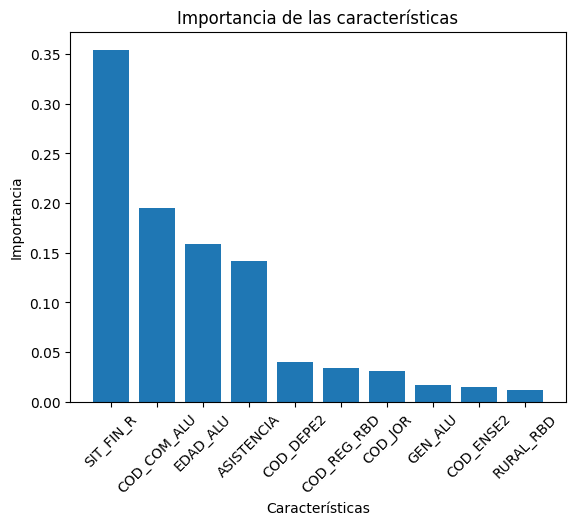

In [ ]:
plt.bar(feature_importances["Feature"],feature_importances["Importance"])
plt.title('Importancia de las características')
plt.xlabel('Características')
plt.ylabel('Importancia')
plt.xticks(rotation=45)

## Pregunta 2
**¿Es posible predecir qué estudiante tendrá un mejor rendimiento a lo largo de los años? ¿Cuáles son las variables más relevantes?**

Si bien no es posible predecir con certeza absoluta el rendimiento de un estudiante, hay varias variables relevantes a analizar en nuestro dataset, las cuales pueden variar dependiendo del contexto educativo, cultural y social, etc.

Se podría utilizar las metodologías de Kmeans, jerarquerización aglomerativa y DBSCAN se podrían generar clusters, para luego evaluarlos con métricas como Silhouette, Calinski-Harabasz, etc. y con esta información realizar un análisis cuantitativo de los clusters formados, es decir si cierto grupo con ciertas características tiene cierto rango de promedio se podría inferir el promedio en base a esto, sin embargo tal como se vio en el hito pasado la clusterización con las variables que se poseen no logra explicar los promedios generales, debido a que se necesitaba información adicional.

Debido a esto decidimos cambiar de enfoque y utilizar **metodos de clasificación**, es decir, vamos a dividir el dataset en uno de entrenamiento y prueba, en donde la variable objetivo será el promedio general del estudiante. Para ello se deberá trabajar con los algoritmos de Árboles de decisión, KNN (determinaremos si se deben escalar atributos), Naive Bayes o Support Vector Machines.

Para evualuar el modelo se utilizará el conjunto de prueba y se calcularán las metricas precision, Accuracy, recall, F1-score, etc.

* Correción: como el promedio en el dataset es una variable continua no es posible directamente aplicar algoritmos de clasificación, por ello nos enfocaremos en algortimos de regresión, uno de ellos a utilizar es DecisionTreeRegressor con la metrica mean_squared_error y otras mencioandas en el desarrollo del experimento. Además en primera instancia el codigo se encuentra escrito para los datos de 2018, pero es exactamente igual para los años 2020 y 2022.

En los siguientes codigos se utiliza primero el dataset sin la evalaución docente y luego con la evaluación docente.


### Desarrollo experimento pregunta 2
## Sin evaluación docente




* Regresión dividiendo el dataset en entrenamiento y prueba:

In [ ]:
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score


from sklearn.model_selection import train_test_split

X = r_2018.drop(columns=['PROM_GRAL'])
X = r_2018.drop(columns=["SIT_FIN_R"])
y = r_2018['PROM_GRAL']

In [ ]:
#Tenemos un atributo categorico el cual es "SIT_FIN_R"

from sklearn.compose import make_column_selector as selector

categorical_columns = selector(dtype_include=object)(X)
print(f"Tenemos {len(categorical_columns)} atributos categóricos en X: {categorical_columns}")

#Vizualizamos como es exactamente:
#r_2018["SIT_FIN_R"]
#conteo_valores = r_2018["SIT_FIN_R"].value_counts()
#conteo_valores


Tenemos 0 atributos categóricos en X: []


In [ ]:
# Se Define el mapeo de valores categóricos a números
mapping = {'P': 0, 'R': 1, 'Y': 2, 'T': 3}

# Realizar codificación ordinal
X = X.copy()
X['SIT_FIN_R'] = X['SIT_FIN_R'].map(mapping)

categorical_columns = selector(dtype_include=object)(X)
print(f"Tenemos {len(categorical_columns)} atributos categóricos en X: {categorical_columns}")

Tenemos 0 atributos categóricos en X: []


In [ ]:
# Separamos el dataset:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=37)

Como tenemos una variable objetivo continua, el cual es el promedio general de cada alumno, en vez de aplicar el algoritmo de DecisionTree(que necesita una la variable a predecir discreta) dispondremos del algoritmo DecisionTreeRegressor, el cual es un modelo de regresión.


In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, median_absolute_error, explained_variance_score

# se crea el modelo de regresión
reg = DecisionTreeRegressor()

# Entrenamos con  X_train e y_train
reg.fit(X_train, y_train)

# Predecimos con nuevos datos, los de test X_test.
y_pred = reg.predict(X_test)


Utilizamos las siguientes metricas usuales:

* Mean Squared Error (MSE)
* Mean Absolute Error (MAE)
* Median Absolute Error (MedAE)
* Explained Variance Score (EV)
* R-squared (coeficiente de determinación)

In [ ]:
# Evaluamos la predicción comparando y_test con y_pred
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
medae = median_absolute_error(y_test, y_pred)
ev = explained_variance_score(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error en test set:", mse)
print("Mean Absolute Error:", mae)
print("Median Absolute Error:", medae)
print("Explained Variance Score:", ev)
print("R-squared:", r2)

Mean Squared Error en test set: 4.4207477693804913e-23
Mean Absolute Error: 4.891732453243697e-12
Median Absolute Error: 3.608668919241609e-12
Explained Variance Score: 1.0
R-squared: 1.0


## Con evaluacion docente

In [ ]:
X = df_merged.drop(columns=['PROM_GRAL'])
X = df_merged.drop(columns=['SIT_FIN_R'])
y = df_merged['PROM_GRAL']

#mapping = {'P': 0, 'R': 1, 'Y': 2, 'T': 3}
#X['SIT_FIN_R'] = X['SIT_FIN_R'].map(mapping)
mapping1 = {'I': 1, 'B': 2, 'C': 3, 'D': 4, "-1": 0}
X['CCE_ESC']= X['CCE_ESC'].map(mapping1)
X['PF_ESC']= X['PF_ESC'].map(mapping1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=37)

reg = DecisionTreeRegressor()

# Entrenamos con  X_train e y_train
reg.fit(X_train, y_train)

# Predecimos con nuevos datos, los de test X_test.
y_pred = reg.predict(X_test)

# Evaluamos la predicción comparando y_test con y_pred
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
medae = median_absolute_error(y_test, y_pred)
ev = explained_variance_score(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error en test set:", mse)
print("Mean Absolute Error:", mae)
print("Median Absolute Error:", medae)
print("Explained Variance Score:", ev)
print("R-squared:", r2)

Mean Squared Error en test set: 4.898482992763825e-25
Mean Absolute Error: 5.343745056799431e-13
Median Absolute Error: 5.648814749292796e-13
Explained Variance Score: 1.0
R-squared: 1.0


Ambos métodos cuentan con unas métricas bastante buenas, siendo el modelo que considera la inclusión de las variables docentes mejor que el que no las incluye.

Con ambos metodos entrenados, si se tuviese data para el año 2019,2020,2021 se podría hacer el mismo proceso anterior de añadir las variables de evaluacion docente a los datasets y predecir los promedios de los alumnos, de esta manera se podría ver si la predicción está equivocada o correcta.

Es decir se deben predecir los promedios de todos los alumnos, estas predicciones pueden ser mayores, menores o iguales:

*   Tanto si son mayores como menores quiere decir que hay factores externos que aún no son capturados que van más alla de la evaluación docente, como pueden ser el nivel socioeconomico, factores sociales, entre otros.
* Si son iguales quiere decir que la regresión y las variables utilizadas explican completamente el fenomeno.

Cabe destacar que es de vital importancia que los datos de evaluación docente fueron filtrados para ser utilizados en colegios municipales y de educación media, si se predijese con este modelo un alumno de colegio particular o de educación basica y colegio municipal, el resultado sería decepcionante.

Además la evaluación docente se realiza año a año, en donde los profesores no se evaluan año a año, es decir hay cierta cantidad de profesores que se evalua año a año más no la totalidad, esto quiere decir por ejemplo que de 10 profesores se evaluan 2 y estamos tomando esos 2 profesores como referencia del colegio para todos los alumnos, lo cual puede inducir a un sesgo en la regresión.

Hay una base de datos de evaluación docente para el año 2020 que también se estudio durante el desarrollo del proyecto durante el semestre, sin embargo dicha base de datos no cuenta con las mismas variables que la base de datos del 2018, por lo tanto hace la predicción imposible.



## Pregunta 3
**¿Los colegios con mayor equidad en distribución entre hombres y mujeres tiene mejores rendimiento?**

Para responder a esta pregunta se podría definir un **factor de equidad** a partir de la agrupación de los datos por rol del establecimiento, que corresponde a una de las variables del dataset existente.
Este factor podría analizarse de dos formas, podría ser la equidad que exite en el colegio completo,
o subdividirse en los grados por colegio y hacer una ponderación final. A continuación estos valores se tratarían como una nueva variable en el dataset original.

Debido al tamaño de la base de datos utilizada, se realiza una agrupación de colegios según categorias de equidad. En el caso de estar normalizada entre (0,1], podrian evaluarse por segmentos/rangos de estos. Esto permitirá comparar y analizar grupos de colegios con diferentes niveles de equidad.

Posterior a esto, se realizaría un análisis comparativo entre los diferentes grupos segun el rendimiento académico. A partir de pruebas estadísticas con test de hipotesis, se determinaría si existen diferencias significativas en el rendimiento entre los grupos.

Asimismo,se realizaría un análisis de regresión lineal para controlar otras variables y evaluar el impacto específico de la equidad de género en el rendimiento.
Si los colegios con una mayor equidad de género tienen un mejor rendimiento en comparación con los colegios con una brecha de género más amplia, esto sugeriría una posible asociación entre equidad de género y rendimiento académico.

### Desarrollo experimento pregunta 3

Se procede a calcular el factor de equidad que exite por colegio a partir de la siguiente relación, para un establecimiento i.

$$factor_i = \frac{Hombre_i}{Mujeres_i}$$

In [ ]:
import statsmodels.formula.api as smf

rbd_unique_2022 = r_2022['RBD'].unique()

# Crear una nueva columna 'factor_e' en el DataFrame 'r_2022'
r_2022['factor_e'] = 0.0

# Calcular y asignar el factor de equidad para cada valor único en 'RBD'
for i in range(len(rbd_unique_2022)):
    r_sub = r_2022[r_2022['RBD'] == rbd_unique_2022[i]]
    hombres = len(r_sub[r_sub['GEN_ALU'] == 1])
    mujeres = len(r_sub[r_sub['GEN_ALU'] == 2])
    if hombres==0 or mujeres ==0:
      factor_equidad = 0
    else:
      factor_equidad = hombres/ mujeres
    r_2022.loc[r_2022['RBD'] == rbd_unique_2022[i], 'factor_e'] = factor_equidad

In [ ]:
rbd_unique_2020 = r_2020['RBD'].unique()

# Crear una nueva columna 'factor_e' en el DataFrame 'r_2022'
r_2020['factor_e'] = 0.0

# Calcular y asignar el factor de equidad para cada valor único en 'RBD'
for i in range(len(rbd_unique_2020)):
    r_sub = r_2020[r_2020['RBD'] == rbd_unique_2020[i]]
    hombres = len(r_sub[r_sub['GEN_ALU'] == 1])
    mujeres = len(r_sub[r_sub['GEN_ALU'] == 2])
    if hombres==0 or mujeres ==0:
      factor_equidad = 0
    else:
      factor_equidad = hombres/ mujeres
    r_2020.loc[r_2020['RBD'] == rbd_unique_2020[i], 'factor_e'] = factor_equidad

In [ ]:
rbd_unique_2018 = r_2018['RBD'].unique()

# Crear una nueva columna 'factor_e' en el DataFrame 'r_2022'
r_2018['factor_e'] = 0.0

# Calcular y asignar el factor de equidad para cada valor único en 'RBD'
for i in range(len(rbd_unique_2018)):
    r_sub = r_2018[r_2018['RBD'] == rbd_unique_2018[i]]
    hombres = len(r_sub[r_sub['GEN_ALU'] == 1])
    mujeres = len(r_sub[r_sub['GEN_ALU'] == 2])
    if hombres==0 or mujeres ==0:
      factor_equidad = 0
    else:
      factor_equidad = hombres/ mujeres
    r_2018.loc[r_2018['RBD'] == rbd_unique_2018[i], 'factor_e'] = factor_equidad

Ahora planteamos un modelo paramétrico cuya variable explicativa es el **promedio general**, el cual nos interesa estudiar. Tambien se eligen las variables de genero, asistencia, edad, región del establecimiento, además del factor de emisión recientemente calculado, ya que creemos son las más representativas para el promedio de un alumno segun el análisis exploratorio llevado a cabo en hitos anteriores.

$$promedio \_ general = \beta_1*factor_e+\beta_2*GEN\_ALU+\beta_3*ASISTENCIA+\beta_4*EDAD\_ALU+\beta_5*COD\_REG\_RBD+ \varepsilon$$


In [ ]:
model_2022 = smf.ols(formula='PROM_GRAL ~  factor_e + GEN_ALU + ASISTENCIA +  EDAD_ALU +  COD_REG_RBD', data=r_2022)

results0 = model_2022.fit()

print(results0.summary())

                            OLS Regression Results                            
Dep. Variable:              PROM_GRAL   R-squared:                       0.264
Model:                            OLS   Adj. R-squared:                  0.264
Method:                 Least Squares   F-statistic:                 2.216e+05
Date:                Wed, 19 Jul 2023   Prob (F-statistic):               0.00
Time:                        22:29:10   Log-Likelihood:            -2.7779e+06
No. Observations:             3092577   AIC:                         5.556e+06
Df Residuals:                 3092571   BIC:                         5.556e+06
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       4.4722      0.003   1476.253      

In [ ]:
model_2020 = smf.ols(formula='PROM_GRAL ~  factor_e + GEN_ALU + ASISTENCIA +  EDAD_ALU +  COD_REG_RBD', data=r_2020)

results1 = model_2020.fit()

print(results1.summary())

                            OLS Regression Results                            
Dep. Variable:              PROM_GRAL   R-squared:                       0.216
Model:                            OLS   Adj. R-squared:                  0.216
Method:                 Least Squares   F-statistic:                 1.685e+05
Date:                Wed, 19 Jul 2023   Prob (F-statistic):               0.00
Time:                        22:29:04   Log-Likelihood:            -3.6091e+06
No. Observations:             3048330   AIC:                         7.218e+06
Df Residuals:                 3048324   BIC:                         7.218e+06
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       3.4932      0.004    789.318      

In [ ]:
model_2018 = smf.ols(formula='PROM_GRAL ~  factor_e + GEN_ALU + ASISTENCIA +  EDAD_ALU +  COD_REG_RBD', data=r_2018)

results2 = model_2018.fit()

print(results2.summary())

                            OLS Regression Results                            
Dep. Variable:              PROM_GRAL   R-squared:                       0.229
Model:                            OLS   Adj. R-squared:                  0.229
Method:                 Least Squares   F-statistic:                 1.783e+05
Date:                Wed, 19 Jul 2023   Prob (F-statistic):               0.00
Time:                        22:29:49   Log-Likelihood:            -2.6849e+06
No. Observations:             2998456   AIC:                         5.370e+06
Df Residuals:                 2998450   BIC:                         5.370e+06
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       3.6592      0.004    905.866      

Se puede observar a partir de los resultados de cada modelo, que en los tres casos el coeficiente del intercepto supera con creces a los coeficientes de las demás variables, lo que quiere decir que las variables explicativas no logran explicar el comportamiento del promedio general, incluyendo esto la nueva variable correspondiente al factor de equidad. Esto tambien se evidencia en los valores de $R^2$ donde se interpreta lo siguiente:

* Modelo_2022: el 26.4% de la variabilidad del modelo está siendo capturada por las variables seleccionadas.
* Modelo_2020: el 21.6% de la variabilidad del modelo está siendo capturada por las variables seleccionadas.
* Modelo_2018: el 22.9% de la variabilidad del modelo está siendo capturada por las variables seleccionadas
.
En cuanto al factor de equidad en si, se obtiene un coeficiente minimo en el año 2022, pero este es mayor en los otros años restantes.

Si bien se podría realizar un algoritmo de clusterización con esta nueva variable como en el Hito 2, no se obtendrían resultados destacables ya que al igual que antes, el dataset no logra capturar la variabilidad esperada, además los datos tienen sesgos, principalmente porque se trata de datos sobre rendimmiento escolar.

## **Contribuciones Hito 3**
1.   Allen Arroyo Garrido: Desarrollo experimento pregunta 2, redacción informe, PPT hito 3  
2.   José Badilla: Desarrollo experimento para responder la pregunta 1 y redacta la parte del informe correspondiente a esta pregunta.
3.   Benjamín Angulo: Desarrollo experimento para responder la pregunta 1 y redacta la parte del informe correspondiente a esta pregunta.
4.   Benjamín Llancao: Desarrollo experimento pregunta 2, redacta la parte del informe correspondiente a esta pregunta, PPT hito 3.  
5.   Bárbara Aguayo: Desarrollo experimento pregunta 3,redacta la parte del informe correspondiente a esta pregunta, PPT hito 3.
